In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from io import StringIO
import json
import pandas as pd
import numpy as np
from data_space import DataSpace

In [2]:
hagstofa_data = DataSpace()
hagstofa_data.add_data_from_data_and_metadata_files(
    'hagstofa', 'hagstofa_data.csv', 'hagstofa_metadata.json')
hagstofa_data.add_data_from_data_and_metadata_files(
    'medical', 'medical_data.csv', 'medical_metadata.json')

In [3]:
print(f'Hagstofa columns: {hagstofa_data.columns("hagstofa")}')
print(
    f"length of hagstofa data: {hagstofa_data.request_length_of_df('hagstofa')}")
print(f'Medical columns: {hagstofa_data.columns("medical")}')
print(
    f"length of medical data: {hagstofa_data.request_length_of_df('medical')}")

Hagstofa columns: Index(['Name', 'Age', 'Gender', 'Birth Date', 'Kennitala', 'Income', 'Email'], dtype='object')
length of hagstofa data: 13308
Medical columns: Index(['Name', 'Age', 'Gender', 'Birth Date', 'Kennitala', 'Gout', 'Obesity',
       'Stress-Related Disorders', 'Cardiovascular Diseases',
       'Eating Disorders', 'Addiction', 'Rare Genetic Disease',
       'Common Allergies', 'Hereditary Condition', 'patient_id'],
      dtype='object')
length of medical data: 5000


In [4]:
print(f'Hagstofa metadata: {hagstofa_data.request_metadata("hagstofa")}')
print(
    f"Hagstofa income metadata: {hagstofa_data.request_column_metadata('hagstofa', 'Income')}")

print(
    f"Hagstofa Kennitala metadata: {hagstofa_data.request_column_metadata('hagstofa', 'Kennitala')}")
print(
    f"Hagstofa Kennitala is standard unique identifier: {hagstofa_data.request_is_column_standard_unique_identifier('hagstofa', 'Kennitala')}")
print(
    f"Medical Kennitala is standard unique identifier: {hagstofa_data.request_is_column_standard_unique_identifier('medical', 'Kennitala')}")

Hagstofa metadata: {'dataset_name': 'Sample Personal Information Dataset', 'description': 'This dataset contains personal details of individuals, including name, age, gender, birth date, identification number (kennitala), income, and email address.', 'columns': {'Name': {'type': 'string', 'description': 'Full name of the individual, including first and last name.'}, 'Age': {'type': 'float', 'description': 'Age of the individual in years, expressed with decimal precision.'}, 'Gender': {'type': 'string', 'description': 'Gender of the individual (e.g., Male, Female).'}, 'Birth Date': {'type': 'date', 'format': 'YYYY-MM-DD', 'description': 'Birth date of the individual in ISO format.'}, 'Kennitala': {'type': 'string', 'is_standard_unique_identifier': True, 'description': 'Icelandic national identification number for the individual, unique to each person.'}, 'Income': {'type': 'float', 'description': 'Yearly income of the individual in thousands ISK, expressed as a floating-point number.'},

In [5]:
income_bins = np.linspace(0, 20000, 21)  # 20 bins between 0 and 20,000
full_income_distribution = hagstofa_data.request_distribution_of(
    'hagstofa', 'Income', bin_ranges=income_bins)
full_income_distribution_df = pd.read_json(StringIO(full_income_distribution))
display(full_income_distribution_df)

,Bin Range,Count
0,0.0 - 1000.0,0
1,1000.0 - 2000.0,442
2,2000.0 - 3000.0,655
3,3000.0 - 4000.0,670
4,4000.0 - 5000.0,702
5,5000.0 - 6000.0,1001
6,6000.0 - 7000.0,1512
7,7000.0 - 8000.0,2014
8,8000.0 - 9000.0,2359
9,9000.0 - 10000.0,2175


In [6]:
user_space = hagstofa_data.create_user_space(['hagstofa', 'medical'])
user_space.info()

Source: hagstofa
Columns: Index(['Name', 'Age', 'Gender', 'Birth Date', 'Kennitala', 'Income', 'Email'], dtype='object')
Length: 13308
Metadata: {'dataset_name': 'Sample Personal Information Dataset', 'description': 'This dataset contains personal details of individuals, including name, age, gender, birth date, identification number (kennitala), income, and email address.', 'columns': {'Name': {'type': 'string', 'description': 'Full name of the individual, including first and last name.'}, 'Age': {'type': 'float', 'description': 'Age of the individual in years, expressed with decimal precision.'}, 'Gender': {'type': 'string', 'description': 'Gender of the individual (e.g., Male, Female).'}, 'Birth Date': {'type': 'date', 'format': 'YYYY-MM-DD', 'description': 'Birth date of the individual in ISO format.'}, 'Kennitala': {'type': 'string', 'is_standard_unique_identifier': True, 'description': 'Icelandic national identification number for the individual, unique to each person.'}, 'Income'

In [7]:
user_space.copy_df('medical', 'research')

'Operation successful.'

In [8]:
user_space.info()

Source: hagstofa
Columns: Index(['Name', 'Age', 'Gender', 'Birth Date', 'Kennitala', 'Income', 'Email'], dtype='object')
Length: 13308
Metadata: {'dataset_name': 'Sample Personal Information Dataset', 'description': 'This dataset contains personal details of individuals, including name, age, gender, birth date, identification number (kennitala), income, and email address.', 'columns': {'Name': {'type': 'string', 'description': 'Full name of the individual, including first and last name.'}, 'Age': {'type': 'float', 'description': 'Age of the individual in years, expressed with decimal precision.'}, 'Gender': {'type': 'string', 'description': 'Gender of the individual (e.g., Male, Female).'}, 'Birth Date': {'type': 'date', 'format': 'YYYY-MM-DD', 'description': 'Birth date of the individual in ISO format.'}, 'Kennitala': {'type': 'string', 'is_standard_unique_identifier': True, 'description': 'Icelandic national identification number for the individual, unique to each person.'}, 'Income'

In [9]:
user_space.filter_df('research', 'Gout', True)

'Operation successful.'

In [10]:
user_space.info()

Source: hagstofa
Columns: Index(['Name', 'Age', 'Gender', 'Birth Date', 'Kennitala', 'Income', 'Email'], dtype='object')
Length: 13308
Metadata: {'dataset_name': 'Sample Personal Information Dataset', 'description': 'This dataset contains personal details of individuals, including name, age, gender, birth date, identification number (kennitala), income, and email address.', 'columns': {'Name': {'type': 'string', 'description': 'Full name of the individual, including first and last name.'}, 'Age': {'type': 'float', 'description': 'Age of the individual in years, expressed with decimal precision.'}, 'Gender': {'type': 'string', 'description': 'Gender of the individual (e.g., Male, Female).'}, 'Birth Date': {'type': 'date', 'format': 'YYYY-MM-DD', 'description': 'Birth date of the individual in ISO format.'}, 'Kennitala': {'type': 'string', 'is_standard_unique_identifier': True, 'description': 'Icelandic national identification number for the individual, unique to each person.'}, 'Income'

In [11]:
user_space.merge_df('hagstofa', 'research', 'Kennitala', 'merged')

'Operation successful.'

In [12]:
user_space.info()

Source: hagstofa
Columns: Index(['Name', 'Age', 'Gender', 'Birth Date', 'Kennitala', 'Income', 'Email'], dtype='object')
Length: 13308
Metadata: {'dataset_name': 'Sample Personal Information Dataset', 'description': 'This dataset contains personal details of individuals, including name, age, gender, birth date, identification number (kennitala), income, and email address.', 'columns': {'Name': {'type': 'string', 'description': 'Full name of the individual, including first and last name.'}, 'Age': {'type': 'float', 'description': 'Age of the individual in years, expressed with decimal precision.'}, 'Gender': {'type': 'string', 'description': 'Gender of the individual (e.g., Male, Female).'}, 'Birth Date': {'type': 'date', 'format': 'YYYY-MM-DD', 'description': 'Birth date of the individual in ISO format.'}, 'Kennitala': {'type': 'string', 'is_standard_unique_identifier': True, 'description': 'Icelandic national identification number for the individual, unique to each person.'}, 'Income'

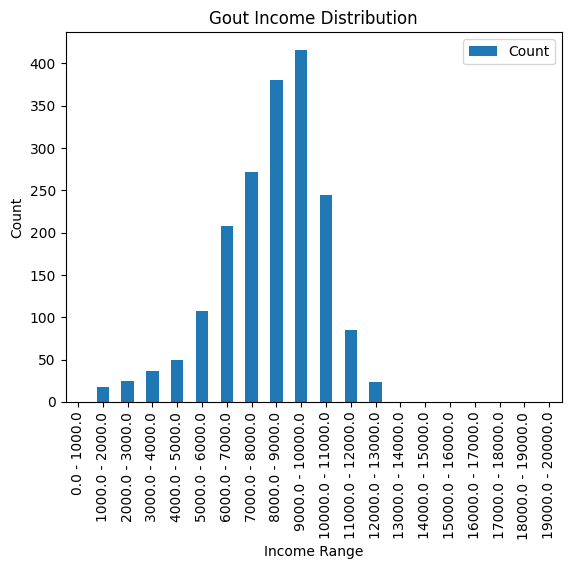

In [13]:
income_bins = np.linspace(0, 20000, 21)  # 20 bins between 0 and 20,000
gout_income_distribution = user_space.request_distribution_of(
    'merged', 'Income', bin_ranges=income_bins)
gout_income_distribution_df = pd.read_json(StringIO(gout_income_distribution))

gout_income_distribution_df.plot(x='Bin Range', y='Count', kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Gout Income Distribution')
plt.show()

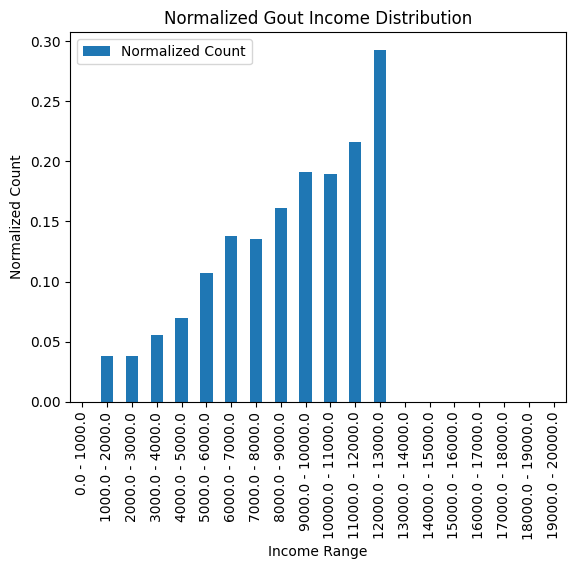

In [14]:
# Normalize the gout income distribution by the full income distribution
normalized_gout_income_distribution_df = gout_income_distribution_df.copy()
normalized_gout_income_distribution_df['Normalized Count'] = normalized_gout_income_distribution_df['Count'] / \
    full_income_distribution_df['Count']

# Plot the normalized gout income distribution
normalized_gout_income_distribution_df.plot(
    x='Bin Range', y='Normalized Count', kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Normalized Count')
plt.title('Normalized Gout Income Distribution')
plt.show()

In [16]:
user_space = hagstofa_data.create_user_space(
    ['hagstofa', 'medical'], shuffle=True)
user_space.copy_df('medical', 'research')
user_space.filter_df('research', 'Gout', True)
user_space.merge_df('hagstofa', 'research', 'Kennitala', 'merged')

'Operation successful.'

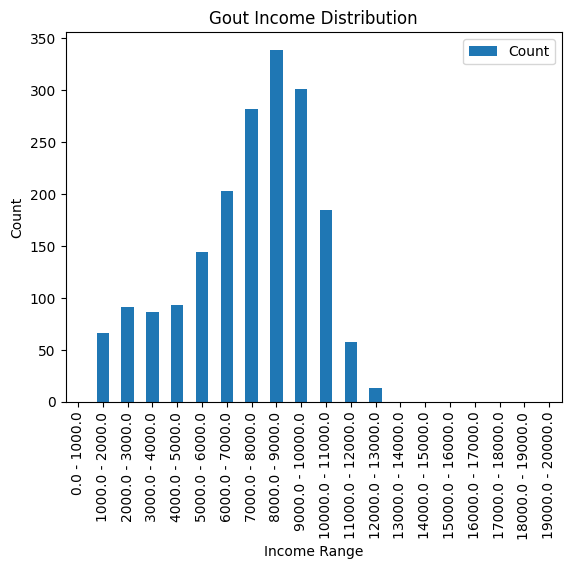

In [17]:
income_bins = np.linspace(0, 20000, 21)  # 20 bins between 0 and 20,000
gout_income_distribution = user_space.request_distribution_of(
    'merged', 'Income', bin_ranges=income_bins)
gout_income_distribution_df = pd.read_json(StringIO(gout_income_distribution))

gout_income_distribution_df.plot(x='Bin Range', y='Count', kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Gout Income Distribution')
plt.show()

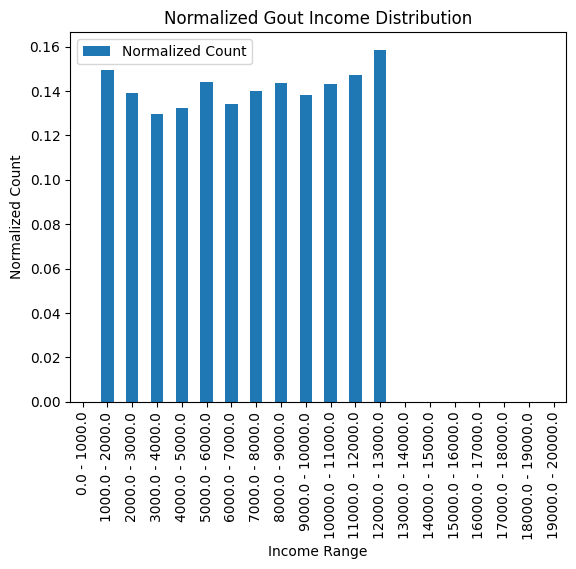

In [18]:
# Normalize the gout income distribution by the full income distribution
normalized_gout_income_distribution_df = gout_income_distribution_df.copy()
normalized_gout_income_distribution_df['Normalized Count'] = normalized_gout_income_distribution_df['Count'] / \
    full_income_distribution_df['Count']

# Plot the normalized gout income distribution
normalized_gout_income_distribution_df.plot(
    x='Bin Range', y='Normalized Count', kind='bar')
plt.xlabel('Income Range')
plt.ylabel('Normalized Count')
plt.title('Normalized Gout Income Distribution')
plt.show()